#**Neider José Silva Parada**

In [1]:
!pip install pyproj

In [2]:
!pip install geopandas

In [3]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.2
Uninstalling Cython-3.0.2:
  Successfully uninstalled Cython-3.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 80.1 MB/s eta 0:00:00


In [4]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp310-cp310-linux_x86_64.whl size=890029 sha256=4cdbb0b934a6f6cfef1fe96c60163da356b379536fcc903a2f3a6db6bba03b5a
  Stored in directory: /root/.cache/pip/wheels/07/bd/06/4e979fa263bca266484ee65f5aab8e6b1c9b20f8caa6f2d7da
Successfully built shapely


In [6]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request
import shapely.geometry as sgeom
import shapely.ops as ops
from functools import partial

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [7]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
#ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [8]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [9]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


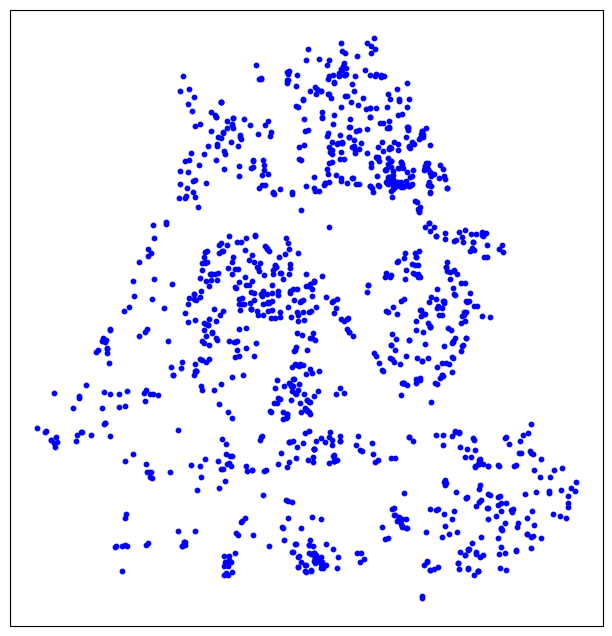

In [10]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [11]:
#Se carga la cartografía de Floridablanca/Melbourne
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

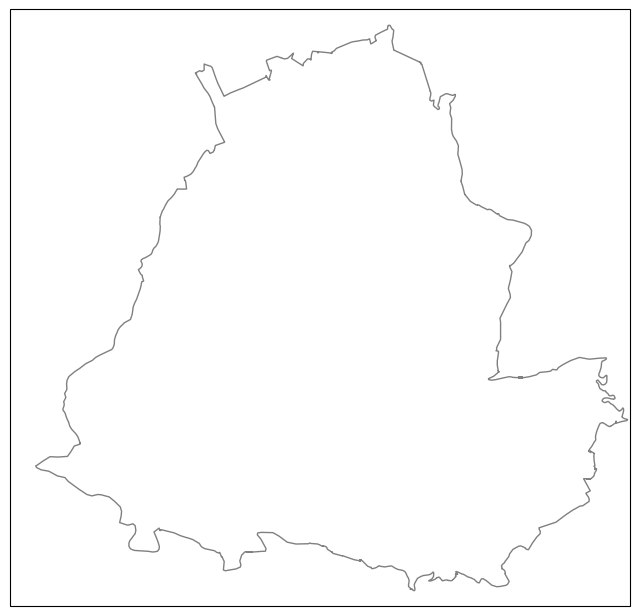

In [12]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

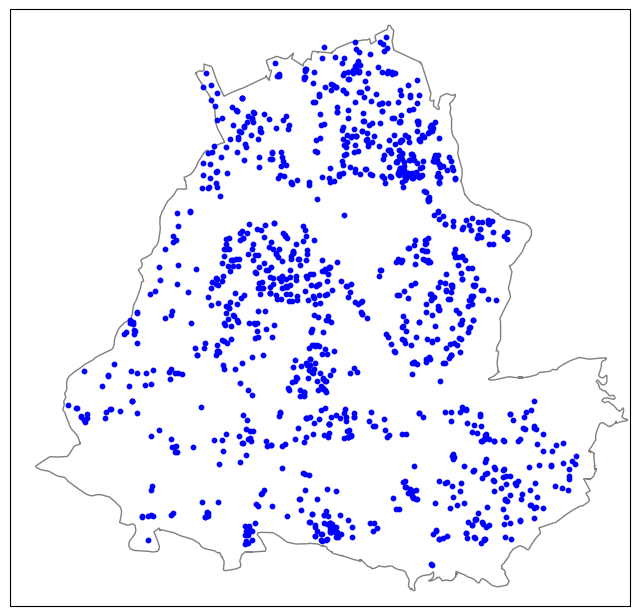

In [13]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [14]:
# Cargar el shapefile en un DataFrame de GeoPandas
gdf = gpd.read_file('68276_urbano.shp')

# Calcular el área en metros cuadrados para cada geometría en Plate Carrée y agregarlo como una nueva columna
gdf = gdf.to_crs({'init': 'epsg:32663'})
gdf['area_m2'] = gdf['geometry'].area

# Sumar todas las áreas para obtener el área total en metros cuadrados
area_total_m2 = gdf['area_m2'].sum()

print("Área total en metros cuadrados (Plate Carrée):", area_total_m2)

Área total en metros cuadrados (Plate Carrée): 14378860.411779443


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [15]:
import numpy as np
from scipy.spatial import cKDTree

# Datos de puntos
points = np.column_stack((df['x'], df['y']))

#points = list(zip(df['x'], df['y']))

def dist_puntos(p1, p2):
  return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

def funcion_k(points, max_dist, area):
  num_points = len(points)
  count = 0
  for i in range(num_points):
    for j in range(i+1, num_points):
      if dist_puntos(points[i], points[j]) <= max_dist:
        count += 1
  k = area * count / num_points**2
  return k

valor_k = funcion_k(points, 100, area_total_m2)
valor_k

35914.55888325239

In [16]:
import geopandas as gpd
import random
from shapely.geometry import Point
import pyproj

# Cargar el shapefile
shapefile_path = '68276_urbano.shp'
gdf = gpd.read_file(shapefile_path)

data_copy = gdf.copy()
crs = pyproj.CRS(proj='utm', zone=18, ellps='WGS84')
data_copy = data_copy.to_crs(crs)
poligono = data_copy['geometry'][0]

# Límites
xmin, ymin = P(gdf.bounds.minx.min(), gdf.bounds.miny.min())
xmax, ymax = P(gdf.bounds.maxx.min(), gdf.bounds.maxy.min())

# Crear una lista para almacenar los grupos de puntos aleatorios
grupos = []

# Número de grupos y puntos por grupo
num_grupos = 9
num_puntos_por_grupo = len(df)

# Para cada grupo
for _ in range(num_grupos):
    grupo = []

    # Generar puntos aleatorios dentro de las geometrías del shapefile
    for _ in range(num_puntos_por_grupo):
        while True:
            # Generar coordenadas aleatorias dentro de la extensión del shapefile
            #x = random.uniform(gdf.bounds.minx.min(), gdf.bounds.maxx.max())
            #y = random.uniform(gdf.bounds.miny.min(), gdf.bounds.maxy.max())
            x = random.uniform(xmin, xmax)
            y = random.uniform(ymin, ymax)

            # Crear un punto con las coordenadas generadas
            punto = Point(x, y)

            # Verificar si el punto está dentro de alguna geometría del shapefile
            if punto.within(poligono):
                grupo.append((x, y))
                break

    grupos.append(grupo)

# Puedes acceder a cada grupo de puntos aleatorios como grupos[0], grupos[1], ..., grupos[8]
# Por ejemplo, para imprimir el primer grupo:
print("Primer grupo de puntos aleatorios:")
print(grupos[0])


Primer grupo de puntos aleatorios:
[(708758.2837511488, 781683.2555514899), (708250.8474795909, 781295.9499677586), (707972.3025732433, 782056.7615526916), (708806.3265447859, 783176.5611955641), (709452.365992985, 781873.0948500503), (709660.0719023176, 784288.7368277143), (709790.2158568065, 784086.770534379), (708126.496610229, 781153.6573766374), (709830.4020913057, 781584.2144152255), (710889.8696942417, 782882.6109791746), (710221.9107712944, 784903.8540890325), (710342.2692705198, 783975.9976452595), (709240.5857443167, 780723.1424788098), (708564.9921506754, 781428.7791124526), (711513.2894745988, 783461.7330857338), (709913.3877138238, 783980.8705465363), (710816.2450371403, 784843.3504003527), (708666.4784156426, 781549.4061907206), (711255.3382626651, 782376.0094826671), (711708.0035631695, 780564.4201440535), (712184.373211709, 781623.8285243812), (710009.6123717501, 781719.484536438), (709269.8821431814, 781067.3329551212), (708662.5103630846, 780698.2014102653), (709331.7

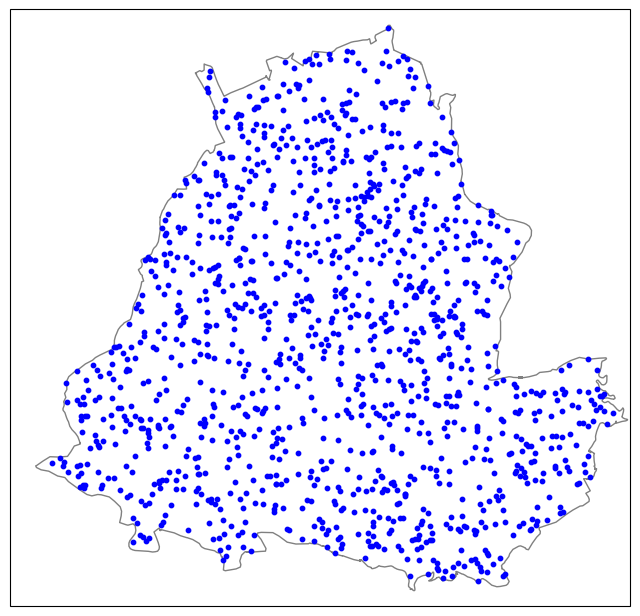

In [17]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

dfGrupo = pd.DataFrame(grupos[0], columns=("x", "y"))
dfGrupo['longitud'], dfGrupo['latitud'] = P(dfGrupo['x'], dfGrupo['y'], inverse=True)

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(dfGrupo['longitud'], dfGrupo['latitud'], zorder=10, c='b', s=10)

plt.show()

In [18]:
valores_k = []

for i in range(len(grupos)):
  dfGrupo = pd.DataFrame(grupos[i], columns=("x", "y"))
  points = np.column_stack((dfGrupo['x'], dfGrupo['y']))

  valores_k.append(funcion_k(points, 100, area_total_m2))

valores_k

[15456.441631002539,
 15041.140045122796,
 15221.705952027032,
 15880.771512227491,
 15221.705952027032,
 14932.800500980256,
 15772.43196808495,
 14743.206298730807,
 16034.25253309609]

In [37]:
df_grupo1 = pd.DataFrame(grupos[0], columns=("x", "y"))
df_grupo2 = pd.DataFrame(grupos[1], columns=("x", "y"))
df_grupo3 = pd.DataFrame(grupos[2], columns=("x", "y"))
df_grupo4 = pd.DataFrame(grupos[3], columns=("x", "y"))
df_grupo5 = pd.DataFrame(grupos[4], columns=("x", "y"))
df_grupo6 = pd.DataFrame(grupos[5], columns=("x", "y"))
df_grupo7 = pd.DataFrame(grupos[6], columns=("x", "y"))
df_grupo8 = pd.DataFrame(grupos[7], columns=("x", "y"))
df_grupo9 = pd.DataFrame(grupos[8], columns=("x", "y"))

In [38]:
df_original = df[['x', 'y']]

dataframes = {
    'df_original': df_original,
    'df_grupo1': df_grupo1,
    'df_grupo2': df_grupo2,
    'df_grupo3': df_grupo3,
    'df_grupo4': df_grupo4,
    'df_grupo5': df_grupo5,
    'df_grupo6': df_grupo6,
    'df_grupo7': df_grupo7,
    'df_grupo8': df_grupo8,
    'df_grupo9': df_grupo9
}

resultados = {'grupo': [], 'distancia_20': [], 'distancia_40': [], 'distancia_60': [], 'distancia_80': [], 'distancia_100': [], 'distancia_120': [], 'distancia_140': [], 'distancia_160': [], 'distancia_180': [], 'distancia_200': []}

for nombre_df, dataframe in dataframes.items():
    resultados['grupo'].append(nombre_df)
    for metros in range(20, 201, 20):
        dataframe_actual = globals()[nombre_df]
        pointsi = np.column_stack((dataframe_actual['x'], dataframe_actual['y']))
        resultado = funcion_k(pointsi, metros, area_total_m2)
        resultados[f'distancia_{metros}'].append(resultado)

df_resultados = pd.DataFrame(resultados)

In [39]:
df_resultados

,grupo,distancia_20,distancia_40,distancia_60,distancia_80,distancia_100,distancia_120,distancia_140,distancia_160,distancia_180,distancia_200
0,df_original,3683.544501,8730.361599,16386.356052,25730.641734,35914.558883,47813.852148,61807.709933,77417.632585,93090.753304,110650.787751
1,df_grupo1,677.122151,2663.347127,5805.193907,9750.558973,15456.441631,22236.691435,29901.714183,38902.924643,48951.417362,59162.419397
2,df_grupo2,577.810902,2473.752925,5426.005502,9542.908180,15041.140045,21559.569284,29161.393965,38018.151699,48472.917708,59604.805869
3,df_grupo3,758.376809,2618.205650,5696.854363,9931.124880,15221.705952,22227.663140,30678.147583,39841.867358,49655.624399,61004.191648
4,df_grupo4,595.867493,2663.347127,5660.741181,10066.549310,15880.771512,22552.681772,30217.704520,39462.678954,49520.199968,60002.050864
5,df_grupo5,659.065560,2356.385085,5561.429933,9678.332610,15221.705952,22083.210414,30118.393272,39318.226228,49727.850761,60652.088129
6,df_grupo6,650.037265,2491.809515,5678.797772,9786.672154,14932.800501,21586.654170,29206.535442,38216.774196,48445.832822,59749.258595
7,df_grupo7,659.065560,2482.781220,5660.741181,10084.605901,15772.431968,22399.200751,29910.742479,38902.924643,48680.568501,60263.871429
8,df_grupo8,631.980674,2446.668039,5669.769477,9822.785336,14743.206299,21442.201445,29269.733509,38316.085445,48608.342139,59460.353144
9,df_grupo9,541.697721,2437.639743,5868.391974,10192.945445,16034.252533,22977.011654,30687.175878,39697.414633,50088.982575,61338.238575


In [40]:
fila_df_original = df_resultados[df_resultados['grupo'] == 'df_original']
percentiles_2_5 = df_resultados.filter(like='distancia_').quantile(0.025)
percentiles_97_5 = df_resultados.filter(like='distancia_').quantile(0.975)

df_final = pd.DataFrame({
    'distancia': [int(col.split('_')[-1]) for col in percentiles_2_5.index],
    'percentil_2.5': percentiles_2_5.values,
    'percentil_97.5': percentiles_97_5.values,
    'K': fila_df_original.iloc[:, 1:].values.flatten()
})

df_final = df_final.sort_values(by='distancia')

df_final

,distancia,percentil_2.5,percentil_97.5,K
0,20,549.823187,3025.381770,3683.544501
1,40,2374.667383,7365.283343,8730.361599
2,60,5456.475999,14019.814134,16386.356052
3,80,9573.378677,22234.660069,25730.641734
4,100,14785.864994,31441.489954,35914.558883
5,120,21468.609209,42225.563037,47813.852148
6,140,29171.550797,54805.589771,61807.709933
7,160,38062.841761,68963.085409,77417.632585
8,180,48451.926922,83415.354890,93090.753304
9,200,59229.454490,99555.464186,110650.787751


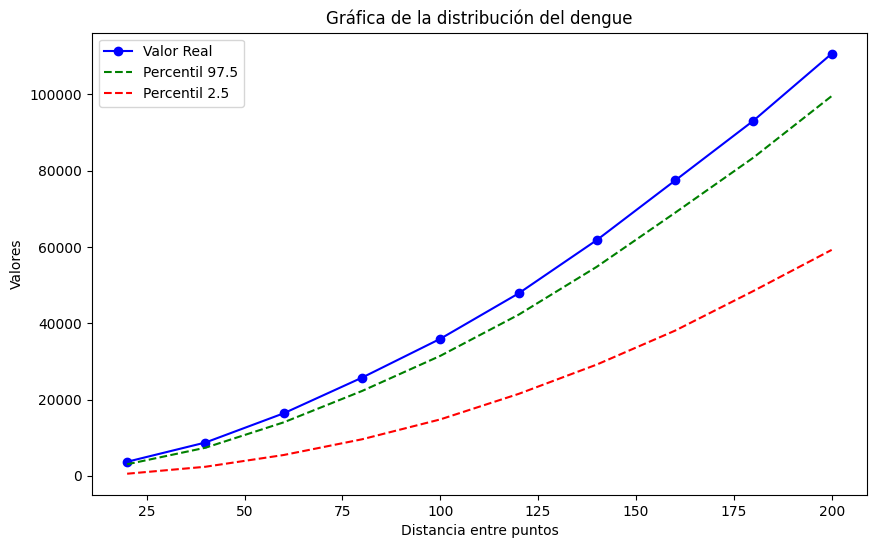

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(df_final['distancia'], df_final['K'], label='Valor Real', color='blue', marker='o')
plt.plot(df_final['distancia'], df_final['percentil_97.5'], label='Percentil 97.5', color='green', linestyle='--')
plt.plot(df_final['distancia'], df_final['percentil_2.5'], label='Percentil 2.5', color='red', linestyle='--')

plt.xlabel('Distancia entre puntos')
plt.ylabel('Valores')
plt.title('Gráfica de la distribución del dengue')
plt.legend()

plt.show()